# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

---



## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

''' old data loading of train & test data
training_file = '../../CarND-TrafficSigns-P2-master/data/train.p'
testing_file = '../../CarND-TrafficSigns-P2-master/data/test.p'
'''

# get the 3 data files
training_file = '../../CarND-TrafficSigns-P2-master/train.p'
validation_file = '../../CarND-TrafficSigns-P2-master/valid.p'
testing_file = '../../CarND-TrafficSigns-P2-master/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [2]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']  # comment out if no pre-made validation
X_test, y_test = test['features'], test['labels']

In [3]:
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

### 1. Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.


- The size of training set is 34799. (or, 39209 including validation set)
- The size of test set is 12630.
- The shape of a traffic sign image is (32, 32). (or, `(32, 32, 3)` if you prefer)
- The number of unique classes/labels in the data set is 43.

In [4]:
import random
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# DONE: Number of training examples
n_train = len(y_train)

# DONE: Number of testing examples.
n_test = len(y_test)

# DONE: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# DONE: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_test, return_index=False).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples = {}".format(len(y_valid)))
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [6]:
# Look at the sign names & class labels
targets = pd.read_csv('signnames.csv')
display(targets[:10])

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [13]:
# Look at count of training set labels
train_label_cts = pd.Series(y_train).value_counts().sort_index()
train_label_cts[:8]

0     180
1    1980
2    2010
3    1260
4    1770
5    1650
6     360
7    1290
dtype: int64


### 2. Include an exploratory visualization of the dataset and identify where the code is in your code file.
Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.


### Let's look at the distribution of labels in the Training, Validation, & Test sets...

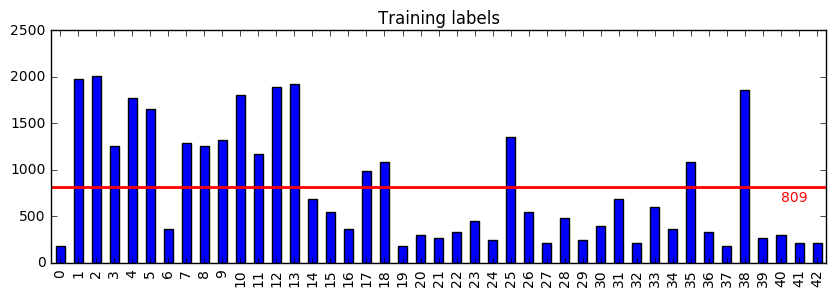

In [8]:
# histogram of training data
plt.figure(figsize=(10,3))
pd.Series(y_train).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_train)/43, linewidth=2, color='r')

avg = int(y_train.shape[0]/43)  # calculate instances if we had balanced labels
plt.text(40,avg-150, str(avg), color='r')
plt.title('Training labels');

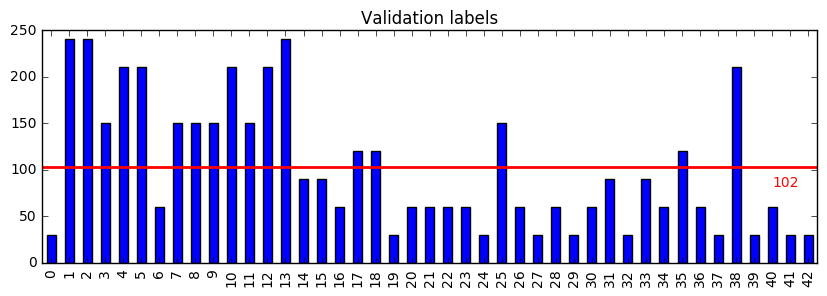

In [9]:
# histogram of validation data
plt.figure(figsize=(10,3))
pd.Series(y_valid).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_valid)/43, linewidth=2, color='r')

avg = int(y_valid.shape[0]/43) # calculate instances if we had balanced labels
plt.text(40,avg-20, str(avg), color='r')
plt.title('Validation labels');

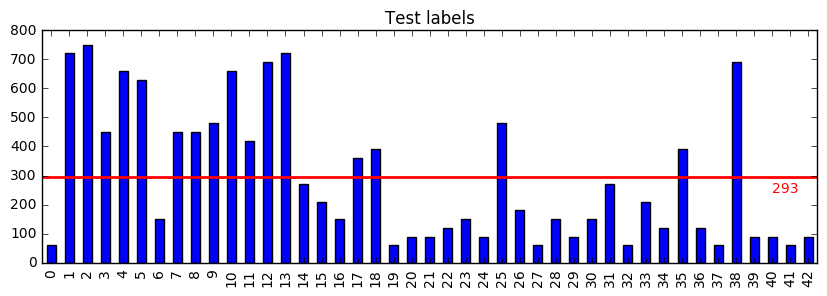

In [10]:
# histogram of test data
plt.figure(figsize=(10,3))
pd.Series(y_test).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_test)/43, linewidth=2, color='r')

avg = int(y_test.shape[0]/43) # calculate instances if we had balanced labels
plt.text(40,avg-50, str(avg), color='r')
plt.title('Test labels');

### Now let's look at some samples of images...

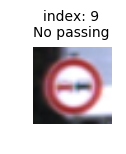

In [11]:
# Look at a random image
i = random.randint(0, len(X_train))
image = X_train[i].squeeze()

plt.rcParams['savefig.dpi']=100.
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.figtext(.5, 1, 'index: ' + str(y_train[i]) + '\n{}'.format(targets.SignName[y_train[i]]), ha='center')
plt.axis('off');

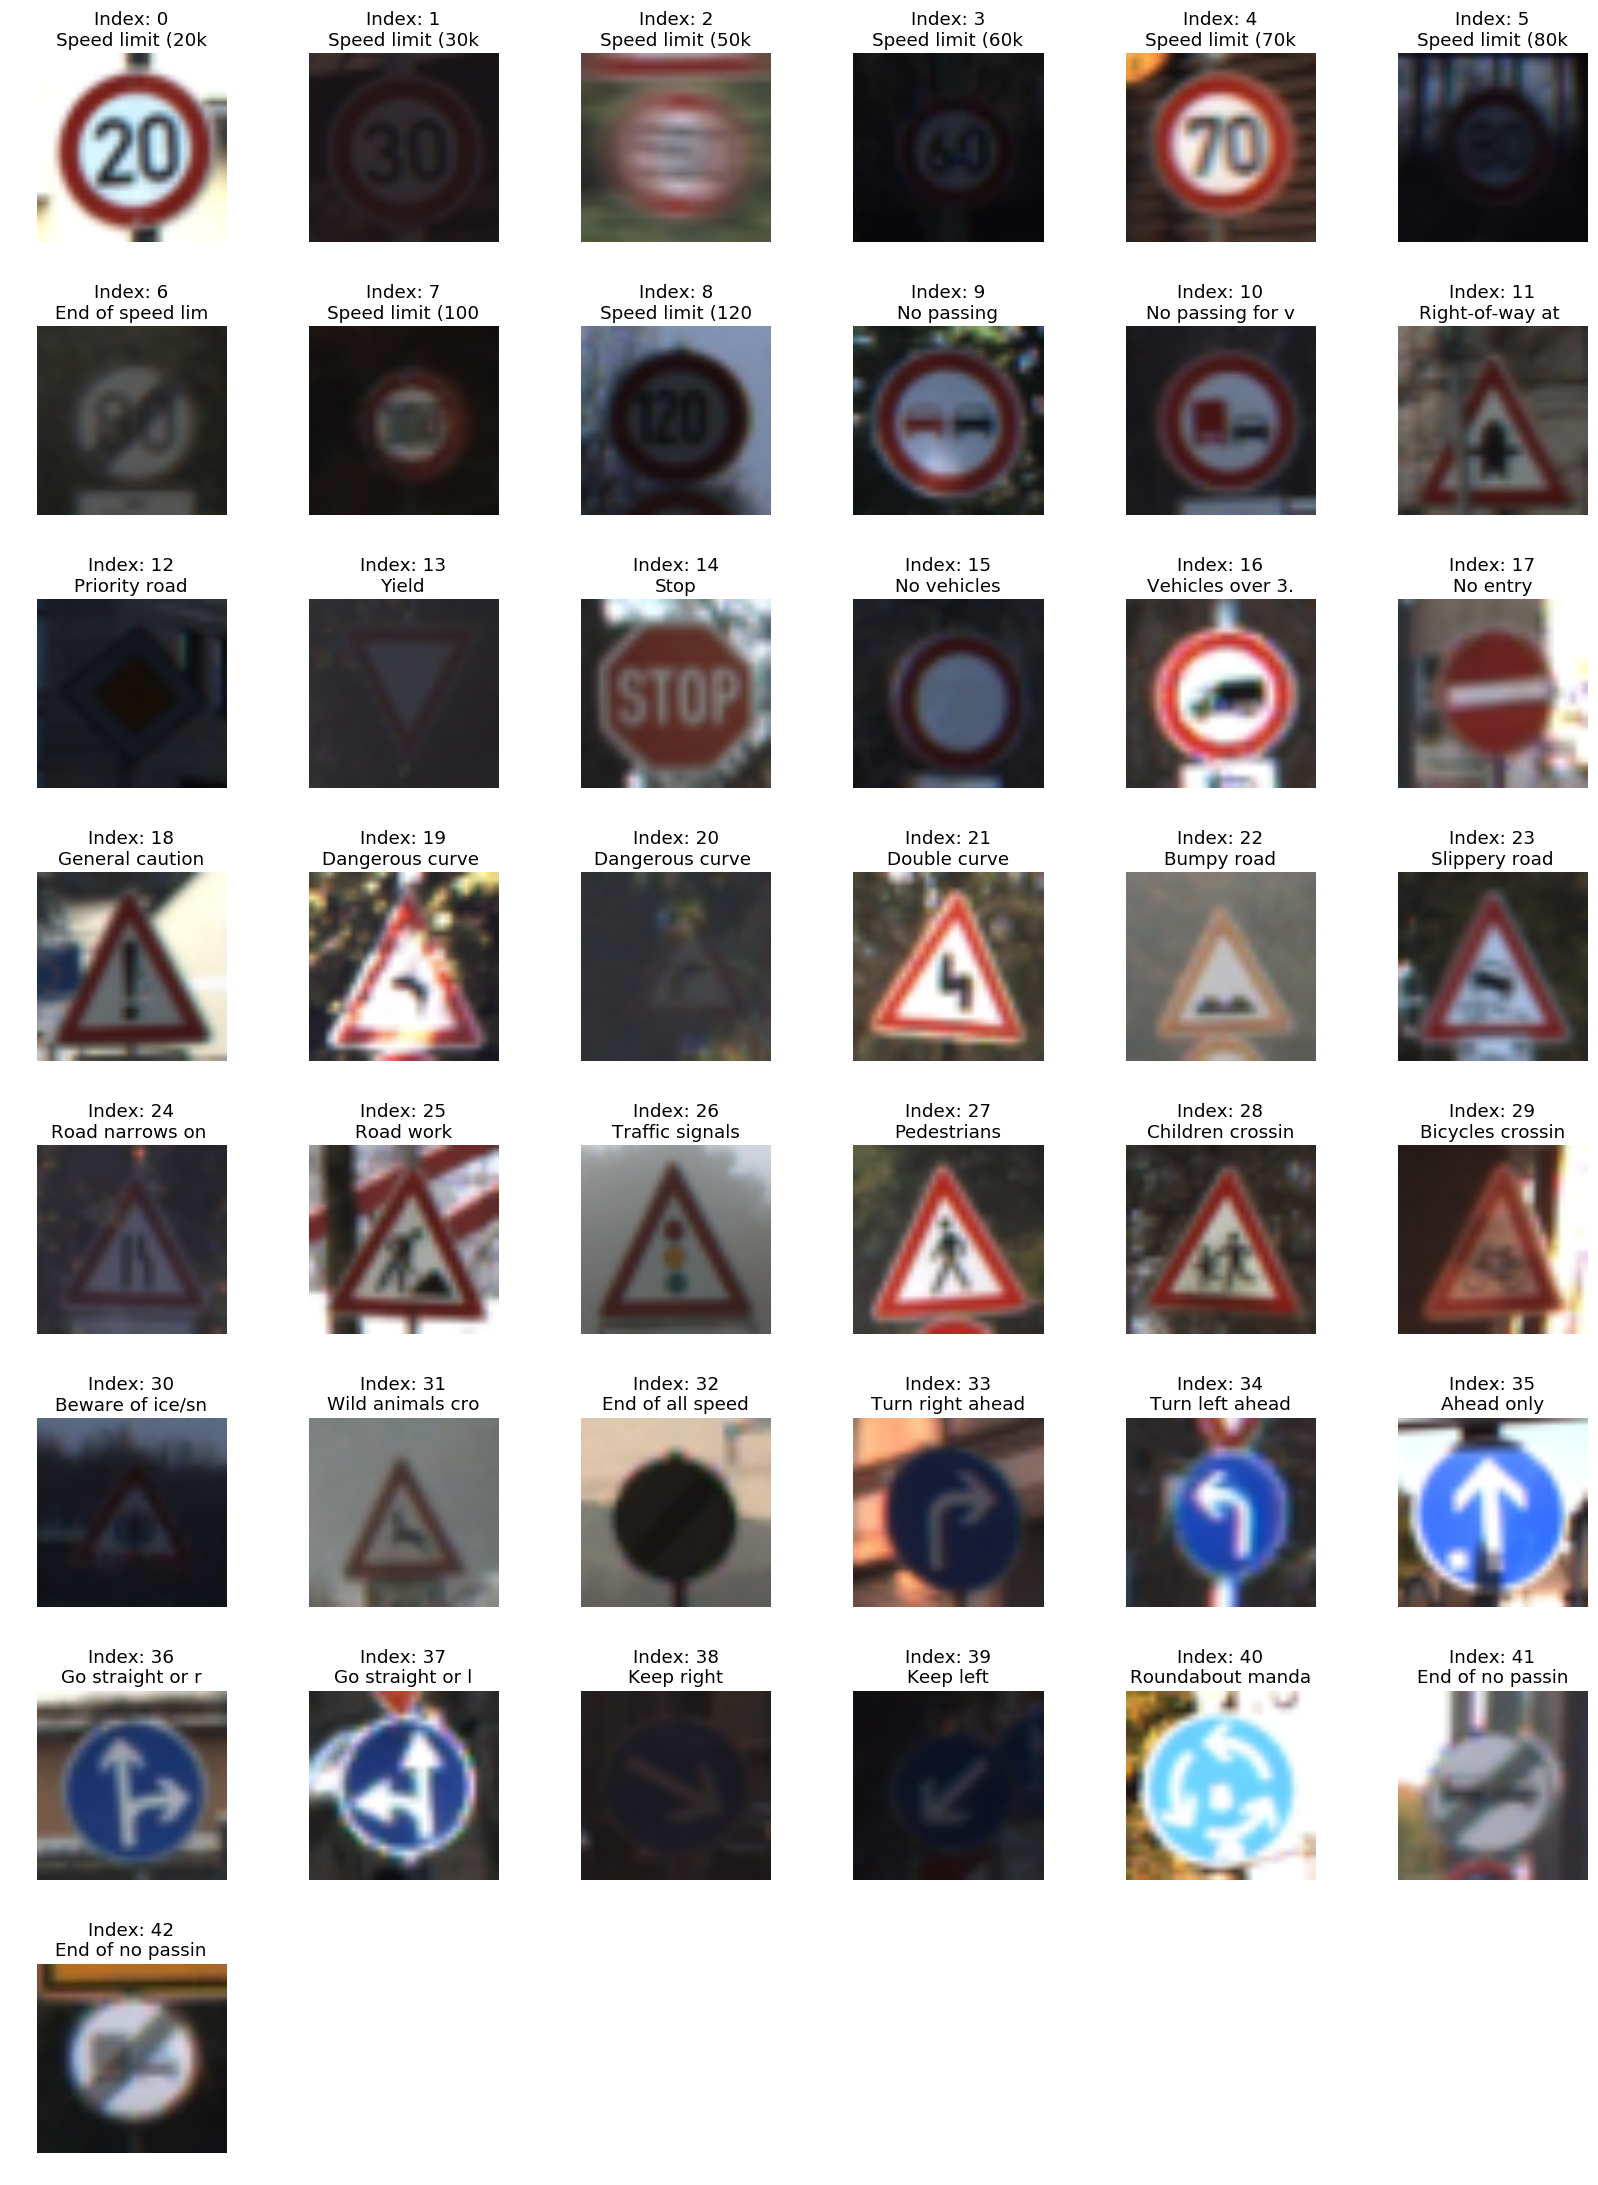

In [14]:
# Look at a random image from each class
plt.rcParams['savefig.dpi']=110.
plt.figure(figsize=(15, 20))
for i in range(n_classes):
    index = random.randint(0, train_label_cts[i]-1)
    target = X_train[y_train==i]
    sample = target[index]
    plt.subplot(8, 6, i+1)
    plt.title("Index: {}\n{}".format(i, targets.iloc[i].SignName[:16]))
    plt.axis('off')
    plt.imshow(sample, cmap="gray")
plt.tight_layout()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### 1. Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? 


**Answer:**
- Used grayscaling of images to concentrate on geometric features of the traffic signs and speed up model training process. 
- Image normalization of values to range -0.5 to 0.5, as commonly prescribed for neural net training.



### 2. Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? 


**Answer:**

- Augmented dataset with additional images to achieve more balanced numbers of each target class.
- Added variations on existing images using image rotation, reversal, brightness. (scroll down to see data augmentation steps and examples).
- Used the exisiting train, validation, and test set splits.


### 3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.



**Answer:**

My final model is taken from the LeNet architecture and consists of the following layers:

|#| Layer         		|     Description	        					| 
|-|:-------------------:|:---------------------------------------------:| 
|0| Input         		| 32x32x1 grayscale image   					| 
|1| Convolution 5x5     | 1x1 stride, VALID padding, outputs 28x28x6 	|
|1| RELU				|												|
|1| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				    |
|2| Convolution 5x5     | 1x1 stride, VALID padding, outputs 10x10x16 	|
|2| RELU				|												|
|2| Max pooling	      	| 2x2 stride,  outputs 5x5x6 				    |
|2| Flatten				| 400 outputs   								|
|3| Fully connected		| 120 outputs  									|
|3| RELU				|												|
|4| Fully connected		| 84 outputs  									|
|4| RELU				|												|
|5| Fully connected		| 43 outputs  									|


### 4. Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.



**Answer:**

- Adam optimizer
- Batch size = 128
- Epochs = 10 (stopped early @ epoch 4)
- Learning rate = .003


### 5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. 



**Answer:**

1. The well-known LeNet architecture was chosen for its general suitability for image classification tasks.

2. Early experiments without data augmentation were unsatisfactory, so the data augmentation strategy was implemented.

3. For the sake of speed, the network was trained with mainly grayscale images.

4. After some further trial and error using different data augmentation sizes and learning rates, the final model results were:

    - __Training__  accuracy   = __94.3%__
    - __Validation__  accuracy = __93.3%__
    - __Test__  accuracy       = __90.2%__

5. We can see the final model's accuracy on the training, validation and test sets are similar and provide evidence that the model is generalizing well.


---
### Let's look at some color transforms...

In [16]:
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from time import time

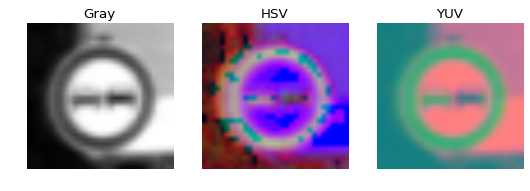

In [17]:
# look at different color transforms
plt.rcParams['savefig.dpi']=80.
plt.figure(figsize=(8, 3))

plt.subplot(131)
plt.title('Gray')
plt.axis('off')
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")

plt.subplot(132)
plt.title('HSV')
plt.axis('off')
img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(img, cmap="gray");

plt.subplot(133)
plt.title('YUV')
plt.axis('off')
img = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
plt.imshow(img, cmap="gray");

In [18]:
### Normalize the images

# normalize to range -0.5 to 0.5
X_train_norm = (X_train - (255/2)) / 255
X_valid_norm = (X_valid - (255/2)) / 255
X_test_norm = (X_test - (255/2)) / 255

print(X_train_norm.shape)
print(X_train_norm[0,:,:,0])

(34799, 32, 32, 3)
[[-0.39019608 -0.39411765 -0.39411765 ..., -0.3745098  -0.37843137
  -0.37843137]
 [-0.38627451 -0.39411765 -0.39411765 ..., -0.3745098  -0.37843137
  -0.38235294]
 [-0.39019608 -0.39411765 -0.39803922 ..., -0.3745098  -0.37843137
  -0.38235294]
 ..., 
 [-0.39411765 -0.39019608 -0.38235294 ..., -0.39411765 -0.39019608
  -0.38627451]
 [-0.39019608 -0.38627451 -0.37843137 ..., -0.39411765 -0.39019608
  -0.39019608]
 [-0.38627451 -0.38235294 -0.3745098  ..., -0.39411765 -0.39411765
  -0.39803922]]


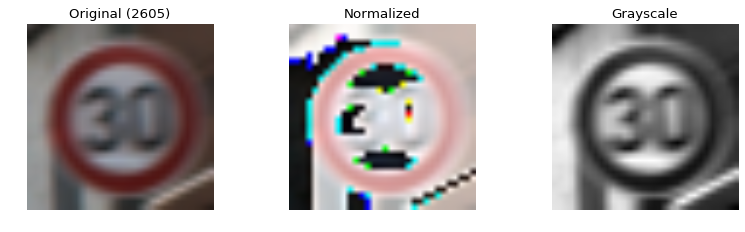

In [19]:
# Look at some normalized images
plt.rcParams['savefig.dpi']=80.
plt.figure(figsize=(12, 3))

index = random.randint(0, len(X_train))
plt.subplot(131)
plt.title('Original ({})'.format(index))
plt.axis('off')
plt.imshow(X_train[index])

plt.subplot(132)
plt.title('Normalized')
plt.axis('off')
plt.imshow(X_train_norm[index])

plt.subplot(133)
plt.title('Grayscale')
plt.axis('off')
img = cv2.cvtColor(X_train[index], cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray');


### Data Augmentation

Below data augmentation functions derived from this post:  
https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3

The labels are unbalanced, so we will augment the training data with transformed images.


In [20]:
# augment the training data: brightness, jitter

def augment_brightness(image):
    ''' Randomly adjust an input image's brightness
    '''
    img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    
    img[:,:,2] = img[:,:,2] * random_bright
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    
    return img

def transform_image(img, ang_range, shear_range, trans_range, brightness=0):
    ''' Generate new images using following arguments:
    1 - img: Input image
    2 - ang_range: Range of angles for rotation
    3 - shear_range: Range of values to apply affine transform
    4 - trans_range: Range of values to apply translations
    
    Parameters for transformation generated from rand uniform dist
    '''
    # Rotation
    ang_rotation = np.random.uniform(ang_range) - ang_range/2
    rows, cols, ch = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), ang_rotation, 1)
    
    # Translation
    tr_x = trans_range*np.random.uniform() - trans_range/2
    tr_y = trans_range*np.random.uniform() - trans_range/2
    Trans_M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    
    # Shear
    pts1 = np.float32([[5,5], [20,5], [5,20]])
    
    pt1 = 5 + shear_range*np.random.uniform() - shear_range/2
    pt2 = 20 + shear_range*np.random.uniform() - shear_range/2
    
    pts2 = np.float32([[pt1, 5], [pt2, pt1], [5,pt2]])
    
    Shear_M = cv2.getAffineTransform(pts1, pts2)
    
    img = cv2.warpAffine(img, Rot_M, (cols, rows))
    img = cv2.warpAffine(img, Trans_M, (cols, rows))
    img = cv2.warpAffine(img, Shear_M, (cols, rows))
    
    # Brightness
    if brightness == 1:
        img = augment_brightness(img)
    
    return img

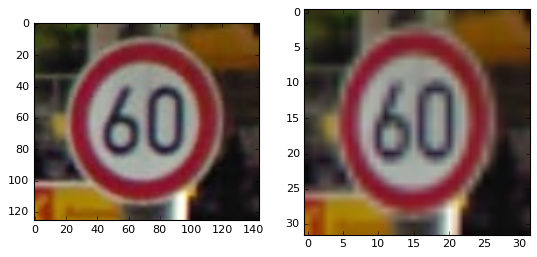

In [21]:
# look at a new test image
plt.rcParams['savefig.dpi']=80.
image = mpimg.imread('./test_images/test-60km.png')
image_resized = cv2.resize(image, (32, 32))

gs = gridspec.GridSpec(1,2)
gs.update(wspace=.02, hspace=.02)  # set spacing b/w axes
plt.figure(figsize=(8,4))

ax = plt.subplot(gs[0])
plt.subplot(1,2,1)
plt.imshow(image)

ax = plt.subplot(gs[1])
plt.subplot(1,2,2)
plt.imshow(image_resized);

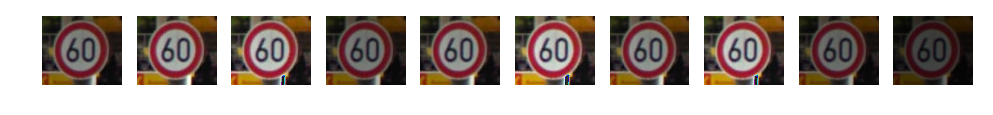

In [22]:
# look at brightness augmentation
gs1 = gridspec.GridSpec(1,10)
gs1.update(wspace=.01, hspace=.02)  # set spacing b/w axes

plt.rcParams['savefig.dpi']=100.
plt.figure(figsize=(12,4))

for i in range(10):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = augment_brightness(image)

    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

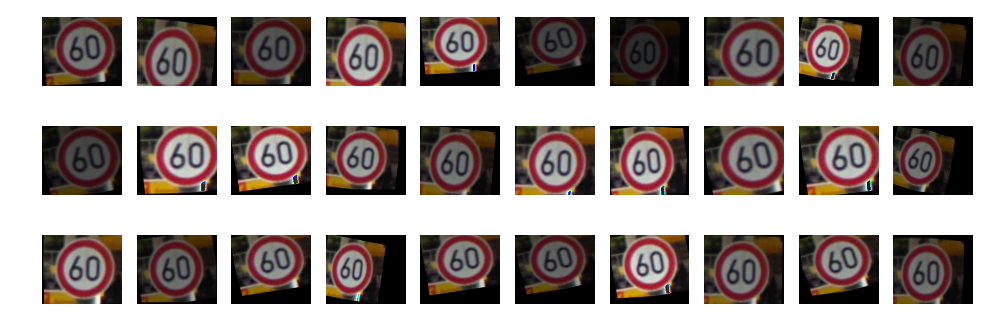

In [23]:
# look at brightness and jitter
NUM_ROWS, NUM_COLS = (3, 10)
ANG_RANGE = 20  # start w/ 20
SHEAR_RANGE = 5  # start w/ 10
TRANS_RANGE = 5  # start w/ 5
BRIGHT = 1  # choose to augment brightness (1 or 0)

gs1 = gridspec.GridSpec(NUM_ROWS, NUM_COLS)
gs1.update(wspace=0.01, hspace=0.02) # set spacing b/w axes

plt.rcParams['savefig.dpi']=100.
plt.figure(figsize=(12,4))

for i in range(NUM_ROWS*NUM_COLS):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image, ANG_RANGE, SHEAR_RANGE, TRANS_RANGE, brightness=BRIGHT)

    plt.subplot(NUM_ROWS, NUM_COLS, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

### Add training images

In [24]:
# loop thru class labels and add images if < MIN_INSTANCES instances
MIN_INSTANCES = 800
for i in range(n_classes):
    count = train_label_cts[i]  # count how many label instances
    if count < MIN_INSTANCES:
        target = X_train[y_train==i]
        num_add = MIN_INSTANCES - count  # number of new imgs to create
        list_add = []
        
        for j in range(num_add):
            index = random.randint(0, count-1)
            sample = target[index]  # get a random sample from the class
            list_add.append(transform_image(sample, ANG_RANGE, SHEAR_RANGE, TRANS_RANGE, brightness=BRIGHT))
            
        X_train = np.concatenate((X_train, np.array(list_add)))  # add new imgs to training set
        y_train = np.append(y_train, np.ones(num_add, dtype=int) * i)  # add labels for new imgs

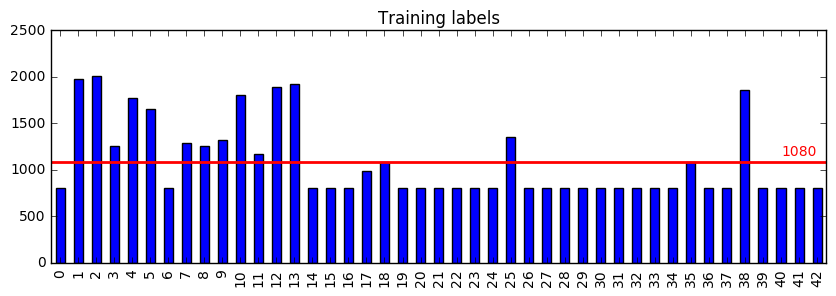

In [25]:
# look at augmented training data
plt.figure(figsize=(10,3))
pd.Series(y_train).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_train)/43, linewidth=2, color='r')
bal = int(y_train.shape[0]/43)
plt.text(40,bal+80, str(bal), color='r')
plt.title('Training labels');

In [26]:
# check the new training set
assert(len(X_train) == len(y_train))
print(X_train.shape)
print(y_train.shape)

(46480, 32, 32, 3)
(46480,)


### Pre-process the images (grayscale, normalization)

In [27]:
### Grayscale the images
X_train_gray = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in X_train]).reshape(-1, 32, 32, 1)
X_valid_gray = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in X_valid]).reshape(-1, 32, 32, 1)
X_test_gray = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in X_test]).reshape(-1, 32, 32, 1)

X_train_gray.shape

(46480, 32, 32, 1)

In [28]:
### Normalize the grayscale images to range -0.5 to 0.5
X_train_norm = (X_train_gray - (255/2)) / 255
X_valid_norm = (X_valid_gray - (255/2)) / 255
X_test_norm = (X_test_gray - (255/2)) / 255

print(X_train_norm.shape)
print(X_train_norm[0,:,:,0])

(46480, 32, 32, 1)
[[-0.39803922 -0.40196078 -0.40196078 ..., -0.38627451 -0.39019608
  -0.39019608]
 [-0.39411765 -0.40196078 -0.40196078 ..., -0.38627451 -0.39019608
  -0.39019608]
 [-0.39411765 -0.40196078 -0.40196078 ..., -0.38627451 -0.39019608
  -0.39019608]
 ..., 
 [-0.40196078 -0.39803922 -0.39803922 ..., -0.40196078 -0.40196078
  -0.39803922]
 [-0.40588235 -0.40196078 -0.39411765 ..., -0.40196078 -0.40196078
  -0.40196078]
 [-0.40196078 -0.39803922 -0.39803922 ..., -0.40196078 -0.40588235
  -0.40980392]]


### Model Architecture

In [53]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32 x 32 x num_channels. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, num_channels, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b
    
    logits = fc3
    
    return logits, conv1

### Train, Validate and Test the Model

In [54]:
def evaluate(X_data, y_data):
    ''' Get accuracy scores
    '''
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [72]:
# Create features and labels
num_channels = 1  # adjust for number of color channels
x = tf.placeholder(tf.float32, (None, 32, 32, num_channels))  # adjust for image channels
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [ ]:
# TODO: placeholders to display the feature maps later
conv1 = tf.placeholder(tf.float32, (None, 14, 14, 6))
conv2 = tf.placeholder(tf.float32, (None, 5, 5, 16))

In [73]:
# Setup for training the model
rate = 0.003  # learning rate, originally .001

logits, conv1 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [74]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

### Load previous results

In [75]:
# load past results
df_results = pd.read_csv('models/results_dict.csv', index_col=0)
df_results[-5:]

,params,test_acc
9,Gray_LR.002_epoch10_batch128,0.903880
10,Gray_Augment800_epoch10_batch128,0.874822
11,Gray_Augment1000_LR.002_epoch10_batch128,0.910135
12,gray_augment750_epoch10_batch128,0.906730
13,gray_augment800_epoch20_batch128,0.912431


### Train the model

In [76]:
# specify hyperparameters
EPOCHS = 10
BATCH_SIZE = 128
cspace = 'gray_augment800'

In [77]:
# run model and save results to dataframe

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    start = time()
    for i in range(EPOCHS):
        X_train_, y_train_ = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_[offset:end], y_train_[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time passed: {:.2f}".format(time()-start))
        print()
        
        # early stopping
        if validation_accuracy > 0.93:
            break
        
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    df_results.ix[len(df_results)] = ['{}_epoch{}_batch{}'.format(cspace, EPOCHS, BATCH_SIZE), test_accuracy]
    
    saver.save(sess, 'models/{}-{}-{}'.format(cspace, EPOCHS, BATCH_SIZE))
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.864
Time passed: 34.00

EPOCH 2 ...
Validation Accuracy = 0.911
Time passed: 68.60

EPOCH 3 ...
Validation Accuracy = 0.923
Time passed: 101.65

EPOCH 4 ...
Validation Accuracy = 0.933
Time passed: 135.36

Test Accuracy = 0.902
Model saved


In [83]:
# save the results
df_results.to_csv('models/results_dict.csv')

In [84]:
# get training set accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))

    train_accuracy = evaluate(X_train_norm, y_train)
    print("Training Accuracy = {:.3f}".format(train_accuracy))

Training Accuracy = 0.943


### Look at test results

In [85]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.902


In [86]:
# get test set predictions
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x:X_test_norm})
    values, indices = tf.nn.top_k(result, 1)
    probs = sess.run(values)
    predictions = sess.run(indices)

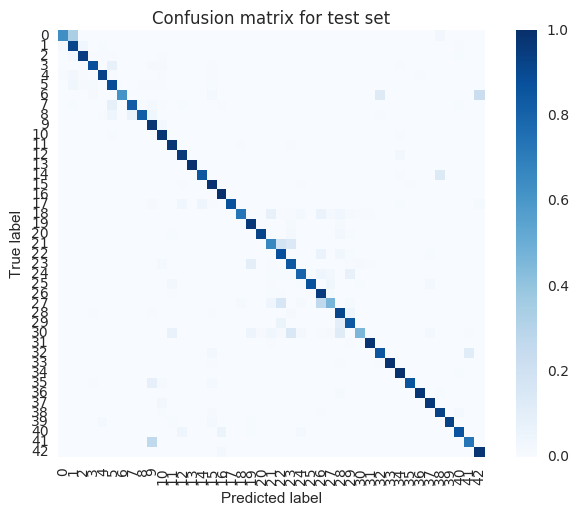

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.rcParams['savefig.dpi']=100.

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the data

# view with a heatmap
sns.heatmap(cm, annot=False, fmt='.3f', cmap='Blues', square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test set');

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.


**Answer:**

- There are 10 new traffic sign images taken from Google Street View, searching near the major soccer stadiums in Germany.

- Each image has some background content that could make classification difficult. 

- The "Pedestrians" crossing sign is in a different design/style than the training images.


### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. 


**Answer:**

- The model was able to correctly guess 9 of 10 traffic signs, which gives an accuracy of 90%.  (scroll down for results)

- The Pedestrian crossing sign couldn't be identified, and a prediction of "Pedestrians" was _NOT_ in the top 5 probabilities unfortunately.

- The 90% accuracy compares favorably to the accuracy on the test set of ~90%.

### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. 



**Answer:**

- The model is highly confident (90-100% confidence) in all its predictions except the Pedestrians sign.

- The model had ~72% confidence in its _incorrect_ prediction of "Traffic signals" for the Pedestrians sign, although it at least understood that the image represented a "caution"-type sign

---
### Load and Output the Images

In [35]:
import os
os.listdir("test_images/")

['test-30km.png',
 'test-60km.png',
 'test-80km.png',
 'test-aheadonly.png',
 'test-keepright.png',
 'test-pedestrians.png',
 'test-rightofway.png',
 'test-slippery.png',
 'test-trafficsignals.png',
 'test-yield.png']

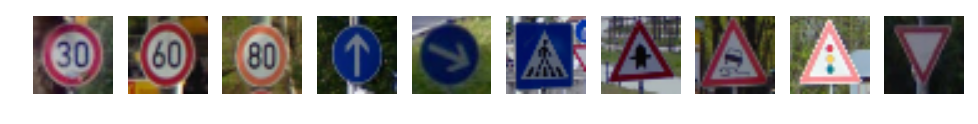

In [36]:
### Load the images and plot them here.
list_images = os.listdir("test_images/")
num_images = len(list_images)

gs1 = gridspec.GridSpec(1,num_images)

plt.rcParams['savefig.dpi']=100.
plt.figure(figsize=(12,4))

newdata = []  # store new images

for i in range(num_images):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    
    img = mpimg.imread('test_images/{}'.format(list_images[i]))
    img = cv2.resize(img[:,:,:3], (32, 32))
    newdata.append(img)
    
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()    

In [37]:
# convert to ndarray
newdata = np.array(newdata)
newdata.shape

(10, 32, 32, 3)

In [38]:
# apply grayscale and normalize
newdata_gray = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in newdata]).reshape(-1, 32, 32, 1)
newdata_norm = (newdata_gray - 0.5)
newdata_norm.shape

(10, 32, 32, 1)

In [39]:
# assign labels to new images
newdata_labels = [1, 3, 5, 35, 38, 27, 11, 23, 26, 13]
newdata_labels = np.array(newdata_labels)
newdata_labels

array([ 1,  3,  5, 35, 38, 27, 11, 23, 26, 13])

### Predict the Sign Type for Each Image

In [80]:
### Run the predictions here.
# get predictions for new images
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x:newdata_norm})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    new_preds = sess.run(indices)
    print(new_preds)

[[ 1  4  2  0 39]
 [ 3  5  2 10  1]
 [ 5  1  0  3 40]
 [35 36 34 15 13]
 [38 34 39 40 14]
 [26 24 11 40 29]
 [11 30 27 18 40]
 [23 10 34 19 30]
 [26 19 23 24 21]
 [13 35 15  9 38]]


### Analyze Performance

In [82]:
### Calculate the accuracy for these 5 new images. 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))

    test_accuracy = evaluate(newdata_norm, newdata_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.900


---
### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

1. __Take this numpy array as an example.__ The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:
```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
...
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

2. __Running it through__ `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:
```
TopKV2(values=array([
       [ 0.34763842,  0.24879643,  0.12789202],
...
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([
       [3, 0, 5],
...
       [1, 4, 3]], dtype=int32))
```

3. __Looking just at the first row__ we get `[ 0.34763842,  0.24879643,  0.12789202]`
    - you can confirm these are the 3 largest probabilities in `a`
    - You'll also notice `[3, 0, 5]` are the corresponding indices

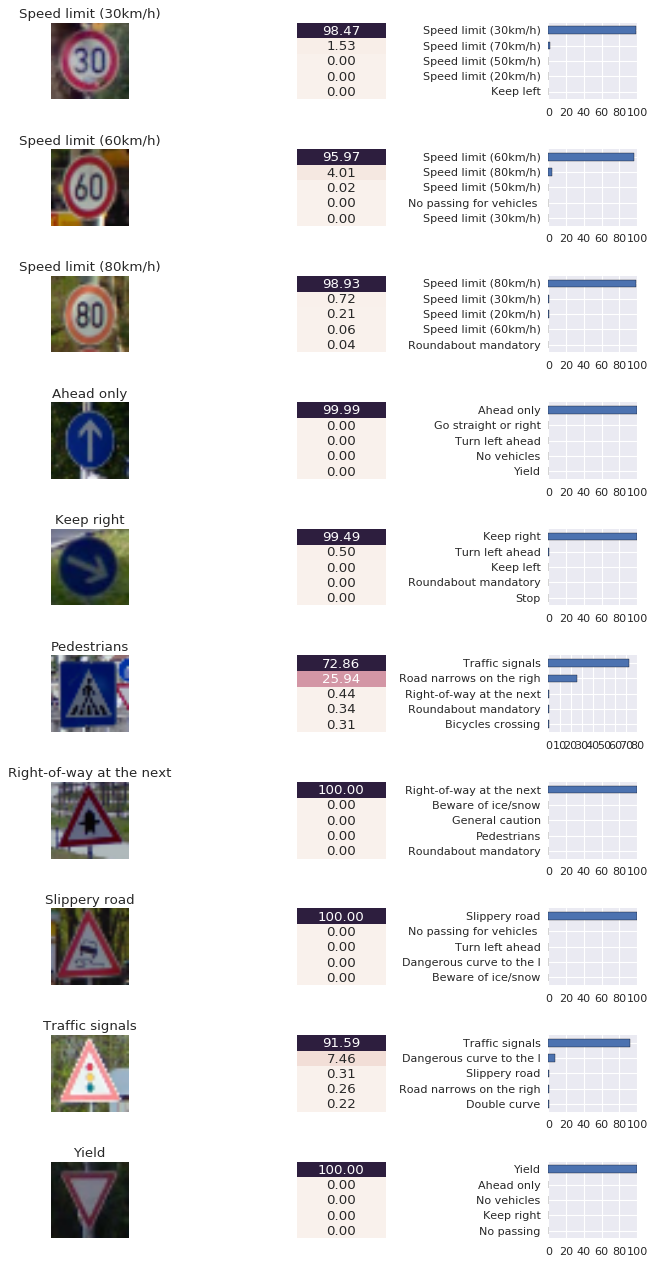

In [81]:
### Visualize the softmax probabilities here.
plt.rcParams['savefig.dpi']=80.
plt.figure(figsize=(8,16))

# loop through test images, plot the softmax probs
for i in range(num_images):
    
    img = newdata[i]
    
    # show traffic sign image
    plt.subplot(num_images, 3, (i*3)+1)
    plt.imshow(img)
    plt.title('{:.24}'.format(targets.SignName[newdata_labels[i]]))
    plt.axis('off')
    
    # show softmax values
    plt.subplot(num_images, 3, (i*3)+2)
    softmax = probs[i].round(8)*100
    sns.heatmap(softmax.reshape(5,1), annot=True, fmt='.2f', cbar=False)
    plt.axis('off')
    
    # plot the softmax values
    plt.subplot(num_images, 3, (i*3)+3)
    top5_labels = [x[:24] for x in targets.SignName[new_preds[i]].tolist()]
    top5 = pd.Series(softmax, index=top5_labels)
    top5.sort_values().plot(kind='barh')    

plt.tight_layout()


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
# TODO: output the last network layer
image_input = newdata_norm[0]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(np.asarray([newdata[0]]), conv1)

In [ ]:
# TODO: output the last network layer
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    
    my_tensor = sess.graph.get_tensor_by_name('conv2:0')
    
    outputFeatureMap(image_input, my_tensor)
    plt.show()

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

The visual output...

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 